# Web Data Scraping



## Data Scarping
This script will serve as the projects Data Request script, pulling information off of the Reddit API. We will be taking information of the Politics Subreddit from both Top and Controversial threads. I hope to use the Title, Domain, and other factors to do a textual analysis to try to see what phrases are related with each thread. 

## Python Libraries

We'll need a few common libraries for all these examples. (if one of these doesn't exist, put it in your `requirements.txt` file and then rebuild your docker image.

In [88]:
# Lets us talk to other servers on the web
import requests

# APIs spit out data in JSON
import json

# Use BeautifulSoup to parse some HTML
from bs4 import BeautifulSoup

# Handling dates and times
from datetime import datetime

# DataFrames!
import pandas as pd

# Data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

# operating system commands
import os

#Reddit Crawling Library
import praw

from collections import Counter

## Scraping Reddit
We will use a wrapper library to communicate with the Reddit API called [Python Reddit API Wrapper](https://praw.readthedocs.io/en/latest/) or `praw`. 

In the texts bellow we will have our reddit API data. I have hidden mine from the public release but you can input your own.



In [89]:
r = praw.Reddit(client_id='',
                client_secret='',
                password='',
                user_agent=''
                username='')

## Requesting Data
Bellow we will request 1000 Top and Controversial post and grab specific data from the information from the JSON Response. We do this in two rounds resulting in 2000 observations split evenly. 

In [100]:
politics_stats = []

for submission in r.subreddit('politics').top('year',limit=1000):
    d = {}
    d['id'] = submission.id
    d['title'] = submission.title
    d['url'] = submission.url
    d['num_comments'] = submission.num_comments
    d['score'] = submission.score
    d['upvote_ratio'] = submission.upvote_ratio
    d['date'] = datetime.utcfromtimestamp(submission.created_utc)
    d['domain'] = submission.domain
    d['gilded'] = submission.gilded
    d['num_crossposts'] = submission.num_crossposts
    d['nsfw'] = submission.over_18
    try:
        d['author'] = submission.author.name
    except:
        d['author'] = None
    d['Type'] = 'Top'
    politics_stats.append(d)
    
for submission in r.subreddit('politics').controversial('year',limit=1000):
    d = {}
    d['id'] = submission.id
    d['title'] = submission.title
    d['url'] = submission.url
    d['num_comments'] = submission.num_comments
    d['score'] = submission.score
    d['upvote_ratio'] = submission.upvote_ratio
    d['date'] = datetime.utcfromtimestamp(submission.created_utc)
    d['domain'] = submission.domain
    d['gilded'] = submission.gilded
    d['num_crossposts'] = submission.num_crossposts
    d['nsfw'] = submission.over_18
    try:
        d['author'] = submission.author.name
    except:
        d['author'] = None
    d['Type'] = 'Controversial'
    politics_stats.append(d)

We then format this data into a Pandas Data Frame and take a peak.

In [101]:
politics_df = pd.DataFrame(politics_stats)
politics_df.head()

,Type,author,date,domain,gilded,id,nsfw,num_comments,num_crossposts,score,title,upvote_ratio,url
0,Top,FuegoFerdinand,2018-11-07 01:02:55,kentucky.com,1,9uuhl3,False,2774,15,101989,"Kim Davis, clerk who refused to sign marriage ...",0.83,https://www.kentucky.com/news/politics-governm...
1,Top,Bloodbath-McGrath,2018-11-19 23:35:44,washingtonpost.com,4,9ymbzc,False,6530,6,89796,Ivanka Trump used a personal email account to ...,0.83,https://www.washingtonpost.com/politics/ivanka...
2,Top,Eurynom0s,2019-01-12 01:21:08,nytimes.com,30,af2foq,False,7994,11,87707,F.B.I. Opened Inquiry Into Whether Trump Was S...,0.81,https://www.nytimes.com/2019/01/11/us/politics...
3,Top,emitremmus27,2019-01-15 16:34:05,thehill.com,1,agabcf,False,7556,9,85165,McConnell blocks House bill to reopen governme...,0.85,https://thehill.com/homenews/senate/425414-mcc...
4,Top,PoliticsModeratorBot,2019-01-18 03:56:54,self.politics,36,ah6gxc,False,30009,9,84372,Megathread: President Trump Directed His Attor...,0.81,https://www.reddit.com/r/politics/comments/ah6...


We compare number of comments and see that the controversial number of comments are much lower than the Top. Not suprising, but the two are linked and in any analysis of them we will have to be mindful.

(array([998.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([    0. ,  1462.4,  2924.8,  4387.2,  5849.6,  7312. ,  8774.4,
        10236.8, 11699.2, 13161.6, 14624. ]),
 <a list of 10 Patch objects>)

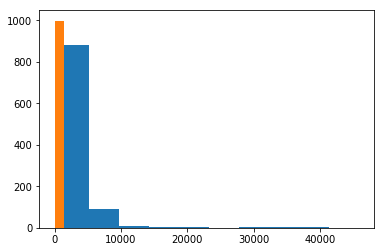

In [102]:
plt.hist(politics_df[politics_df.Type == 'Top'].num_comments)
plt.hist(politics_df[politics_df.Type == 'Controversial'].num_comments)

A similar story playes out for the post score.

(array([996.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0. ,  155.7,  311.4,  467.1,  622.8,  778.5,  934.2, 1089.9,
        1245.6, 1401.3, 1557. ]),
 <a list of 10 Patch objects>)

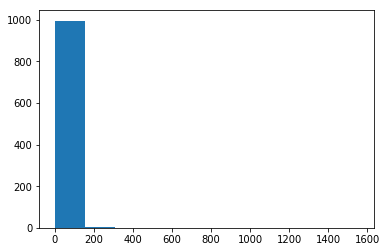

In [118]:
#plt.hist(politics_df[politics_df.Type == 'Top'].score)
plt.hist(politics_df[politics_df.Type == 'Controversial'].score)

Finally we look at the top 20 website domains and the number of times they appear to give us an idea if any news sites are more associated with Top or Controversial.

In [104]:
domain_top = Counter(politics_df[politics_df.Type == 'Top'].domain)
domain_top.most_common(20)

[('thehill.com', 106),
 ('newsweek.com', 69),
 ('washingtonpost.com', 65),
 ('self.politics', 41),
 ('businessinsider.com', 37),
 ('cnbc.com', 35),
 ('cnn.com', 34),
 ('independent.co.uk', 30),
 ('thinkprogress.org', 28),
 ('commondreams.org', 27),
 ('nytimes.com', 26),
 ('huffingtonpost.com', 24),
 ('lawandcrime.com', 23),
 ('vox.com', 22),
 ('theweek.com', 18),
 ('nbcnews.com', 18),
 ('thedailybeast.com', 16),
 ('motherjones.com', 14),
 ('axios.com', 14),
 ('salon.com', 14)]

In [105]:
domain_con = Counter(politics_df[politics_df.Type == 'Controversial'].domain)
domain_con.most_common(20)

[('thehill.com', 98),
 ('washingtonpost.com', 45),
 ('politico.com', 32),
 ('thedailybeast.com', 28),
 ('commondreams.org', 26),
 ('cnn.com', 26),
 ('theintercept.com', 26),
 ('washingtontimes.com', 25),
 ('newsweek.com', 23),
 ('nytimes.com', 22),
 ('rightwingwatch.org', 20),
 ('theguardian.com', 20),
 ('nypost.com', 18),
 ('washingtonexaminer.com', 16),
 ('jacobinmag.com', 16),
 ('foxnews.com', 16),
 ('slate.com', 16),
 ('theroot.com', 15),
 ('yahoo.com', 14),
 ('huffingtonpost.com', 14)]

In [107]:
politics_df.to_csv('PoliticsDataSet.csv')